In [30]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
from collections import Counter
from nltk import pos_tag, word_tokenize, classify, bigrams, trigrams
from nltk.corpus import stopwords as stpwds
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [31]:
edmunds = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\Assignment 3 Edmunds Posts.csv")
senti = pd.read_csv("C:\\Users\\Owner\\Desktop\\Python\\SentScores.csv")

# Part A

In [32]:
nodes = list(senti.columns.values)

In [37]:
#create dictionary out of sales for each car brand
CarSales = {'A6': 20000, 'A8':12000, '3-Series':220000, '5-Series': 60000, 
            '7-Series':14000,'XJ': 6600, 'ES':135000, 'LS':30000, 'RX': 120000, 'S-Class':25000}

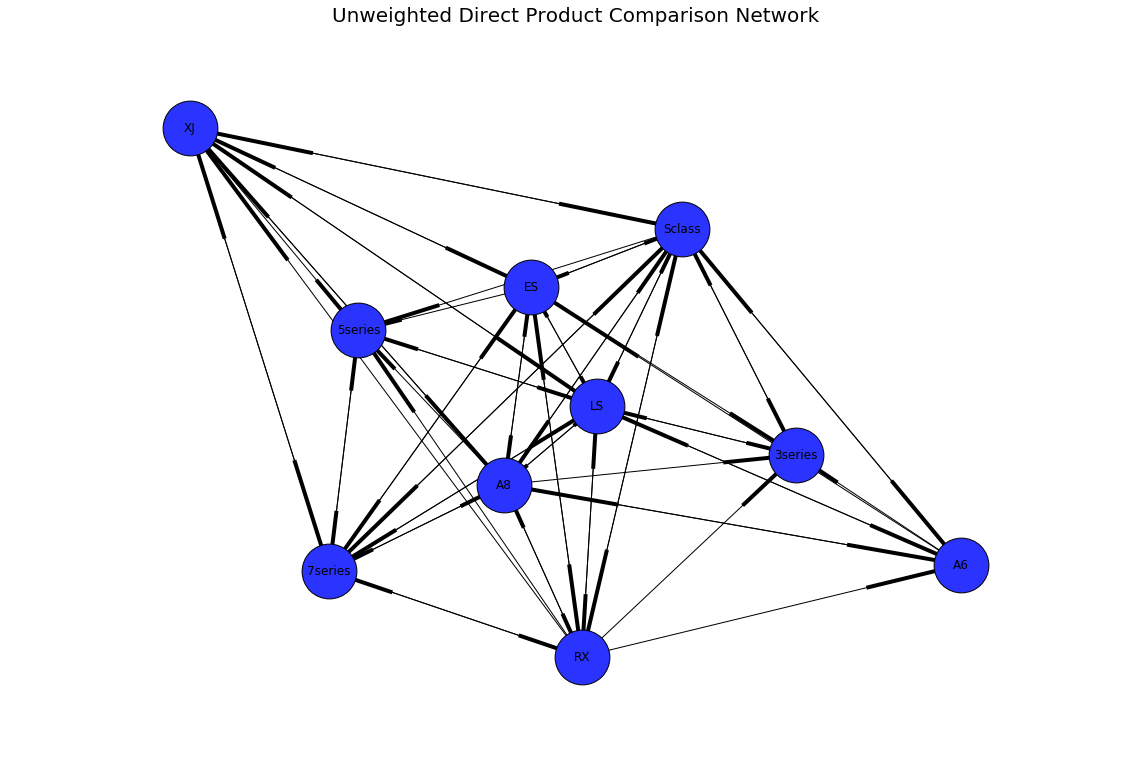

In [34]:
DG = nx.DiGraph()
for i in range(len(senti)):
    for x in senti.columns.values:
        if senti.ix[i][x] > 0:
            for y in senti.columns.values:
                if senti.ix[i][y] > 0:
                    if senti.ix[i][x] > senti.ix[i][y]:
                        if (x,y) not in DG.edges():
                            DG.add_edges_from([(x,y)])

# Create plot

plt.figure(figsize=(15,10))

pos=nx.spring_layout(DG)
nx.draw(DG,pos,node_color = [50/300., 200/1000., 250/250.], node_size=3000)
node_labels = {node:node for node in DG.nodes()}
nx.draw_networkx_labels(DG, pos, labels=node_labels)

plt.title("Unweighted Direct Product Comparison Network", fontsize=20)

pylab.show()

# Part B

Unweighted Pagerank Scores

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
edmunds = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Edmunds Posts.csv")
senti = pd.read_csv("C:\Users\Sean\Desktop\Fall 2016\Text_Analytics\Group Assignment 3\Assignment 3 Sentiment Scores.csv")

In [4]:
nodes = list(senti.columns.values)
col = senti.columns
ar = []
for i in range(len(col)-1):
    for j in range(len(col)):
        if j>i:
            pos = senti[[col[i],col[j]]][(senti[col[i]]>senti[col[j]])]
            neg = senti[[col[i],col[j]]][senti[col[i]]<senti[col[j]]]
            posv = (pos[col[i]]-pos[col[j]]).sum()
            negv = (neg[col[j]]-neg[col[i]]).sum()
            sen = posv-negv
            ar.append((col[i],col[j],sen))

In [5]:
ar2=[]
for i in ar:
    if i[2]<0:
        ar2.append((i[1],i[0],-i[2]))
    else:
        ar2.append(i)

In [6]:
DG=nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(ar2)

In [7]:
pr = nx.pagerank(DG, alpha=0.9)

In [8]:
page_rank_arr = []
page_rank_arr2 = []
for i in col:
    page_rank_arr.append((i,pr[i]*25000))
    page_rank_arr2.append(pr[i]*25000)

In [9]:
DG=nx.DiGraph()
DG.add_nodes_from(nodes,node_size=page_rank_arr)
DG.add_weighted_edges_from(ar2)

col2 = []
for i in col:
    col2.append(i)

### Network

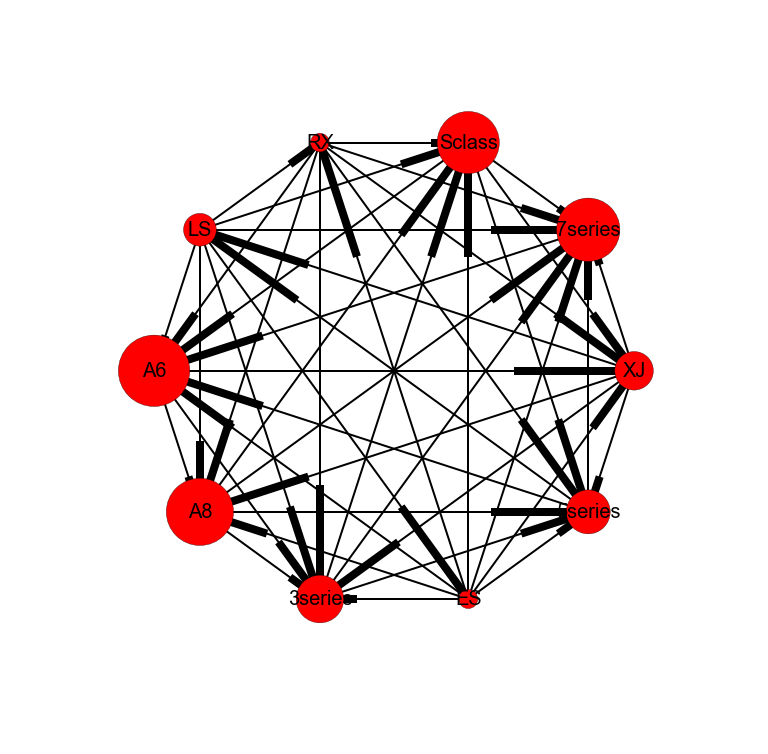

In [10]:
plt.figure(figsize=(10,10))
nx.draw_circular(DG,nodelist=col2, font_size=20, width=2,
               node_size=page_rank_arr2,with_labels=True)

### Page Rank

In [12]:
pr

{'3series': 0.09075063199737358,
 '5series': 0.07747619904919195,
 '7series': 0.160637672216164,
 'A6': 0.20423676408794073,
 'A8': 0.18100343990158038,
 'ES': 0.014493643595622937,
 'LS': 0.043016219287835916,
 'RX': 0.013939189488911659,
 'Sclass': 0.15486717266353944,
 'XJ': 0.059579067711839545}